#  Обратное распространение ошибки

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* http://cs231n.stanford.edu/handouts/linear-backprop.pdf
* https://www.adityaagrawal.net/blog/deep_learning/bprop_fc
* https://en.wikipedia.org/wiki/Stochastic_gradient_descent

## Задачи для совместного разбора

1\. Реализуйте обратное распространение ошибки для модели нейрона с квадратичной функцией потерь при условии, что на вход нейрону поступает вектор `inputs`. Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

Градиент по весам: dL/dw = 2 * (predicted - target) * inputs

Градиент по смещению: dL/db = 2 * (predicted - target)

In [ ]:
import torch


class Neuron:
    def __init__(self, input_size):

        self.weights = torch.randn(input_size, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

    def forward(self, inputs):

        return torch.dot(inputs, self.weights) + self.bias


def mse_loss(predicted, target):
    return ((predicted - target) ** 2).mean()


def manual_gradients(neuron, inputs, target):

    predicted = neuron.forward(inputs)


    error = predicted - target  

  
    grad_weights = 2 * error * inputs


    grad_bias = 2 * error

    return grad_weights, grad_bias


def check_gradients(neuron, inputs, target):
   
    predicted = neuron.forward(inputs)


    loss = mse_loss(predicted, target)


    loss.backward() 

    
    auto_grad_weights = neuron.weights.grad
    auto_grad_bias = neuron.bias.grad

    return auto_grad_weights, auto_grad_bias


if __name__ == "__main__":

    inputs = torch.tensor([1.0, 2.0, 3.0])
    target = torch.tensor(4.0)


    neuron = Neuron(input_size=3)


    manual_grad_weights, manual_grad_bias = manual_gradients(neuron, inputs, target)


    auto_grad_weights, auto_grad_bias = check_gradients(neuron, inputs, target)

 
    print("Ручные градиенты:")
    print("Веса:", manual_grad_weights)
    print("Смещение:", manual_grad_bias)

    print("\nАвтоматические градиенты:")
    print("Веса:", auto_grad_weights)
    print("Смещение:", auto_grad_bias)

    # Сравнение результатов
    print("\nСравнение результатов:")
    print("Веса:", torch.allclose(manual_grad_weights, auto_grad_weights))
    print("Смещение:", torch.allclose(manual_grad_bias, auto_grad_bias))

Ручные градиенты:
Веса: tensor([-1.6736, -3.3472, -5.0208], grad_fn=<MulBackward0>)
Смещение: tensor([-1.6736], grad_fn=<MulBackward0>)

Автоматические градиенты:
Веса: tensor([-1.6736, -3.3472, -5.0208])
Смещение: tensor([-1.6736])

Сравнение результатов:
Веса: True
Смещение: True


2\. Настройте модель нейрона, используя метод стохастического градиентного спуска

In [ ]:

class Neuron:
    def __init__(self, input_size):

        self.weights = torch.randn(input_size, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

    def forward(self, inputs):
  
        return torch.dot(inputs, self.weights) + self.bias

    def update_weights(self, lr):

        with torch.no_grad():  
            self.weights -= lr * self.weights.grad
            self.bias -= lr * self.bias.grad

            self.weights.grad.zero_()
            self.bias.grad.zero_()


def mse_loss(predicted, target):
    return ((predicted - target) ** 2).mean()


def train_neuron(neuron, inputs, targets, lr=0.01, epochs=100):
    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(inputs)):
         
            input_sample = inputs[i]
            target_sample = targets[i]

 
            predicted = neuron.forward(input_sample)

            # Вычисляем потери
            loss = mse_loss(predicted, target_sample)
            total_loss += loss.item() 

     
            loss.backward()


            neuron.update_weights(lr)

 
        print(f"Итерация {epoch + 1}/{epochs}, Потеря: {total_loss / len(inputs)}")


if __name__ == "__main__":

    torch.manual_seed(42)
    inputs = torch.tensor([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0], [4.0, 5.0]])
    targets = torch.tensor([3.0, 5.0, 7.0, 9.0])


    neuron = Neuron(input_size=2)

  
    train_neuron(neuron, inputs, targets, lr=0.01, epochs=100) 

    
    test_input = torch.tensor([5.0, 6.0])
    predicted = neuron.forward(test_input)
    print(f"Предсказание для входа {test_input}: {predicted.item()}")

Итерация 1/100, Потеря: 8.182143211364746
Итерация 2/100, Потеря: 0.037986502051353455
Итерация 3/100, Потеря: 0.034758919617161155
Итерация 4/100, Потеря: 0.034507592441514134
Итерация 5/100, Потеря: 0.03347308706725016
Итерация 6/100, Потеря: 0.03243000234942883
Итерация 7/100, Потеря: 0.03141757860430516
Итерация 8/100, Потеря: 0.030436625966103747
Итерация 9/100, Потеря: 0.029486269428161904
Итерация 10/100, Потеря: 0.02856558479834348
Итерация 11/100, Потеря: 0.027673731674440205
Итерация 12/100, Потеря: 0.026809720933670178
Итерация 13/100, Потеря: 0.025972639996325597
Итерация 14/100, Потеря: 0.025161674682749435
Итерация 15/100, Потеря: 0.02437606535386294
Итерация 16/100, Потеря: 0.023615001671714708
Итерация 17/100, Потеря: 0.02287762932246551
Итерация 18/100, Потеря: 0.022163376270327717
Итерация 19/100, Потеря: 0.021471379179274663
Итерация 20/100, Потеря: 0.020800927362870425
Итерация 21/100, Потеря: 0.020151454489678144
Итерация 22/100, Потеря: 0.01952230537426658
Итераци

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Реализуйте обратное распространение ошибки для модели нейрона с функцией потерь MSE при условии, что на вход нейрону поступает пакет (двумерный тензор) `inputs`. Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

$$\mathbf{X} = \begin{bmatrix}
x_{10} & x_{11} & \ldots & x_{1m} \\
x_{20} & x_{21} & \ldots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{k0} & x_{k1} & \ldots & x_{km} \\
\end{bmatrix}
\mathbf{Y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{k} \\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_{0} \\
w_{1} \\
\vdots \\
w_{m} \\
\end{bmatrix}$$

$$\hat{\mathbf{Y}} = \mathbf{X}\times \mathbf{W}$$

$$L = \frac{1}{k}\sum_{k}{(\hat{y_k}-y_k)^2}$$

$$\nabla_{\hat{\mathbf{Y}}} L=\begin{bmatrix}
\frac{\partial L}{\partial \hat{y_1}} \\
\frac{\partial L}{\partial \hat{y_2}} \\
\vdots \\
\frac{\partial L}{\partial \hat{y_k}} \\
\end{bmatrix} = \frac{2}{k}\begin{bmatrix}
\hat{y_1} - y_1 \\
\hat{y_2} - y_2 \\
\vdots \\
\hat{y_k} - y_k \\
\end{bmatrix}$$

$$\boldsymbol{\nabla_{\mathbf{W}} L = \mathbf{X}^T\nabla_{\hat{\mathbf{Y}}} L}$$

- [ ] Проверено на семинаре

In [ ]:
import torch


k, m = 3, 2  

X = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], requires_grad=False)
W = torch.tensor([0.5, 0.5], requires_grad=True)
Y = torch.tensor([1.0, 2.0, 3.0], requires_grad=False)


Y_hat = X @ W


L = torch.mean((Y_hat - Y) ** 2)


grad_Y_hat_manual = 2 * (Y_hat - Y) / k
grad_W_manual = X.T @ grad_Y_hat_manual

L.backward()
grad_W_auto = W.grad


print("Градиент по W (вручную):", grad_W_manual)
print("Градиент по W (авто):", grad_W_auto)


assert torch.allclose(grad_W_manual, grad_W_auto), "Градиенты не совпадают!"
print("Градиенты совпадают!")

Градиент по W (вручную): tensor([11.6667, 14.6667], grad_fn=<MvBackward0>)
Градиент по W (авто): tensor([11.6667, 14.6667])
Градиенты совпадают!


<p class="task" id="2"></p>

2\. Настройте модель нейрона, используя метод мини-пакетного градиентного спуска. Используйте обратное распространение ошибки, реализованное самостоятельно.

- [ ] Проверено на семинаре

In [ ]:
import torch as th
from sklearn.datasets import make_regression


X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)  
y = th.FloatTensor(y).reshape(-1, 1)  


learning_rate = 0.01  
num_epochs = 1000  
batch_size = 16  


class SimpleNeuralNetwork(th.nn.Module):
    def __init__(self):
        super(SimpleNeuralNetwork, self).__init__()
        self.linear = th.nn.Linear(4, 1)  

    def forward(self, x):
        return self.linear(x)  


model = SimpleNeuralNetwork()


def mean_squared_error(y_pred, y_true):
    return th.mean((y_pred - y_true) ** 2)


optimizer = th.optim.SGD(model.parameters(), lr=learning_rate) 


for epoch in range(num_epochs):

    indices = th.randperm(X.size(0)) #randperm из библиотеки PyTorch, которая генерирует случайную перестановку целых чисел от 0 до n-1.
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for i in range(0, X.size(0), batch_size):
      
        X_batch = X_shuffled[i:i + batch_size] 

        y_batch = y_shuffled[i:i + batch_size]

      
        y_pred = model(X_batch)

  
        loss = mean_squared_error(y_pred, y_batch)

        optimizer.zero_grad()

     
        loss.backward()

        # Обновляем параметры
        optimizer.step()

    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


with th.no_grad():
    y_test_pred = model(X)
    test_loss = mean_squared_error(y_test_pred, y)
    print(f'Test Loss: {test_loss.item():.4f}')

Epoch [100/100], Loss: 0.0000
Test Loss: 0.0000


<p class="task" id="3"></p>

3\. Реализуйте обратное распространение ошибки для модели полносвязного слоя с функцией потерь MSE при условии, что на вход нейрону поступает пакет (двумерный тензор) `inputs`.  Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

$$\mathbf{X} = \begin{bmatrix}
x_{10} & x_{11} & \ldots & x_{1m} \\
x_{20} & x_{21} & \ldots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{k0} & x_{k1} & \ldots & x_{km} \\
\end{bmatrix}
\mathbf{Y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{k} \\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_{01} & w_{02} & \ldots & w_{0n} \\
w_{11} & w_{12} & \ldots & w_{1n} \\
\vdots & \vdots & \ddots & \vdots \\
w_{m1} & w_{m2} & \ldots & w_{mn} \\
\end{bmatrix}$$

$$\hat{\mathbf{Y}} = \mathbf{X}\times \mathbf{W}$$

$$\nabla_{\hat{\mathbf{Y}}} L = \begin{bmatrix}
\frac{\partial L}{\partial \hat{y_{11}}} & \ldots & \frac{\partial L}{\partial \hat{y_{1n}}} \\
\vdots & \vdots & \vdots \\
\frac{\partial L}{\partial \hat{y_{k1}}} & \ldots & \frac{\partial L}{\partial \hat{y_{kn}}} \\
\end{bmatrix}$$

$$\boldsymbol{\nabla_{\mathbf{W}} L = \mathbf{X}^T\times \nabla_{\hat{\mathbf{Y}}} L}$$
$$\boldsymbol{\nabla_{\mathbf{X}} L = \nabla_{\hat{\mathbf{Y}}} L\times \mathbf{W}^T}$$

- [ ] Проверено на семинаре

In [ ]:
import torch as th


inputs = th.randn(4, 3, requires_grad=True)  

print("Входные данные:", inputs)
targets = th.randn(4, 1)  # Целевые значения для 4 примеров
print("Целевые зачения:", targets)

weights = th.randn(3, 1, requires_grad=True)  
print("случайные веса:", weights)

bias = th.randn(1, requires_grad=True)  
print("Смещение:", bias)

predictions = th.matmul(inputs, weights) + bias  


loss = th.mean((predictions - targets) ** 2)  # MSE = (1/n) * Σ(y_hat - y)^2


loss.backward()  

grad_weights = weights.grad  
grad_bias = bias.grad 
grad_inputs = inputs.grad  


nabla_Y_hat = 2 * (predictions - targets) / targets.size(0)  # ∇L/∇Y_hat


nabla_W = th.matmul(inputs.T, nabla_Y_hat)  # ∇L/∇W = X^T * ∇L/∇Y_hat


nabla_X = th.matmul(nabla_Y_hat, weights.T)  # ∇L/∇X = ∇L/∇Y_hat * W^T


print("Градиенты (автоматическое дифференцирование):")
print("Градиенты по весам:", grad_weights)
print("Градиенты по смещению:", grad_bias)
print("Градиенты по входам:", grad_inputs)

print("\nГрадиенты (вручную):")
print("Градиенты по весам (вручную):", nabla_W)
print("Градиенты по входам (вручную):", nabla_X)


print("\nПроверка на равенство градиентов:")
print("Градиенты по весам равны:", th.allclose(grad_weights, nabla_W))
print("Градиенты по входам равны:", th.allclose(grad_inputs, nabla_X))

Входные данные: tensor([[ 0.3873,  2.1670,  0.7405],
        [-0.0175,  0.4581, -0.3623],
        [ 0.1469, -1.5635,  0.0352],
        [ 0.5230,  0.3933, -0.5146]], requires_grad=True)
Целевые зачения: tensor([[-0.2190],
        [-2.5274],
        [-0.0455],
        [ 1.1995]])
случайные веса: tensor([[-1.4438],
        [-0.3079],
        [ 0.4598]], requires_grad=True)
Смещение: tensor([0.3433], requires_grad=True)
Градиенты (автоматическое дифференцирование):
Градиенты по весам: tensor([[-0.5507],
        [-0.6720],
        [-0.0702]])
Градиенты по смещению: tensor([0.4851])
Градиенты по входам: tensor([[ 0.2335,  0.0498, -0.0744],
        [-1.8685, -0.3984,  0.5950],
        [-0.4868, -0.1038,  0.1550],
        [ 1.4214,  0.3031, -0.4527]])

Градиенты (вручную):
Градиенты по весам (вручную): tensor([[-0.5507],
        [-0.6720],
        [-0.0702]], grad_fn=<MmBackward0>)
Градиенты по входам (вручную): tensor([[ 0.2335,  0.0498, -0.0744],
        [-1.8685, -0.3984,  0.5950],
        

<p class="task" id="4"></p>

4\. Настройте полносвязный слой, используя метод пакетного градиентного спуска. Используйте обратное распространение ошибки, реализованное самостоятельно.

- [ ] Проверено на семинаре

In [ ]:
import torch as th
from sklearn.datasets import make_regression


X, y, coef = make_regression(n_samples=100, n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)  
y = th.FloatTensor(y).reshape(-1, 1)  


class LinearRegressionModel(th.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = th.nn.Linear(input_size, output_size)  

    def forward(self, x):
        return self.linear(x)  


input_size = 4  
output_size = 1  
model = LinearRegressionModel(input_size, output_size)


criterion = th.nn.MSELoss()  #
learning_rate = 0.01  
optimizer = th.optim.SGD(model.parameters(), lr=learning_rate)  


num_epochs = 100  
for epoch in range(num_epochs):

    y_pred = model(X)


    loss = criterion(y_pred, y)


    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step()  


    if (epoch+1) % 10 == 0:
        print(f'Итерация [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



with th.no_grad(): 
    predicted = model(X)
    print("Предсказанные значения:", predicted[:5])
    print("Истинные значения:", y[:5])

Итерация [10/100], Loss: 6645.5742
Итерация [20/100], Loss: 4491.8232
Итерация [30/100], Loss: 3047.0366
Итерация [40/100], Loss: 2074.5789
Итерация [50/100], Loss: 1417.7621
Итерация [60/100], Loss: 972.5503
Итерация [70/100], Loss: 669.6708
Итерация [80/100], Loss: 462.8561
Итерация [90/100], Loss: 321.1086
Итерация [100/100], Loss: 223.5909
Предсказанные значения: tensor([[-117.9447],
        [  -2.2200],
        [   0.4142],
        [ -25.1000],
        [  21.6682]])
Истинные значения: tensor([[-142.5654],
        [  -3.9616],
        [  -0.3354],
        [ -33.6895],
        [  26.6184]])


<p class="task" id="5"></p>

5\. Используя решения предыдущих задач, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Полносвязный слой с 1 нейроном

В процессе обучения сохраняйте прогнозы промежуточных моделей. Визуализируйте облако точек и промежуточные прогнозы не менее 4 промежуточных моделей. Визуализируйте прогнозы итоговой модели.

- [ ] Проверено на семинаре

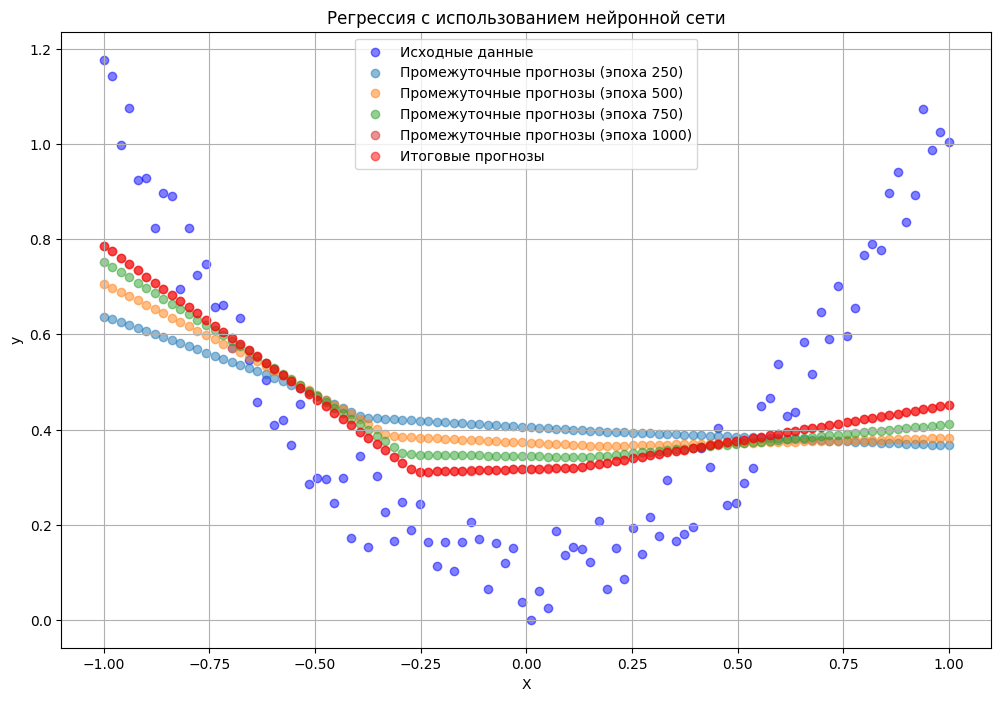

In [ ]:

import torch as th
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


th.manual_seed(42)


X = th.linspace(-1, 1, 100).view(-1, 1) 
y = X.pow(2) + 0.2 * th.rand(X.size())  


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)  
        self.fc2 = nn.Linear(10, 1)   

    def forward(self, x):
        x = th.relu(self.fc1(x))  
        x = self.fc2(x)            
        return x


def train_model(model, X, y, learning_rate=0.01, epochs=1000):
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    loss_function = nn.MSELoss()


    intermediate_predictions = []

    for epoch in range(epochs):
        model.train()  
        optimizer.zero_grad() 

        
        predictions = model(X)

       
        loss = loss_function(predictions, y)


        loss.backward()
        optimizer.step() 


        if (epoch + 1) % 250 == 0:
            intermediate_predictions.append(predictions.detach().numpy()) #Метод detach() используется для создания нового тензора, который не будет отслеживаться для вычисления градиентов. 

    return intermediate_predictions


model = SimpleNN()


intermediate_predictions = train_model(model, X, y, learning_rate=0.01, epochs=1000)


plt.figure(figsize=(12, 8))


plt.scatter(X.numpy(), y.numpy(), color='blue', label='Исходные данные', alpha=0.5)


for i, preds in enumerate(intermediate_predictions):
    plt.scatter(X.numpy(), preds, label=f'Промежуточные прогнозы (эпоха {250 * (i + 1)})', alpha=0.5)


final_predictions = model(X).detach().numpy()
plt.scatter(X.numpy(), final_predictions, color='red', label='Итоговые прогнозы', alpha=0.5)


plt.title('Регрессия с использованием нейронной сети')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

<p class="task" id="6"></p>

6\. Cоздайте нейросеть и решите задачу регрессии из предыдущей задачи.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

В процессе обучения сохраняйте прогнозы промежуточных моделей. Визуализируйте облако точек и промежуточные прогнозы не менее 4 промежуточных моделей. Визуализируйте прогнозы итоговой модели.

- [ ] Проверено на семинаре

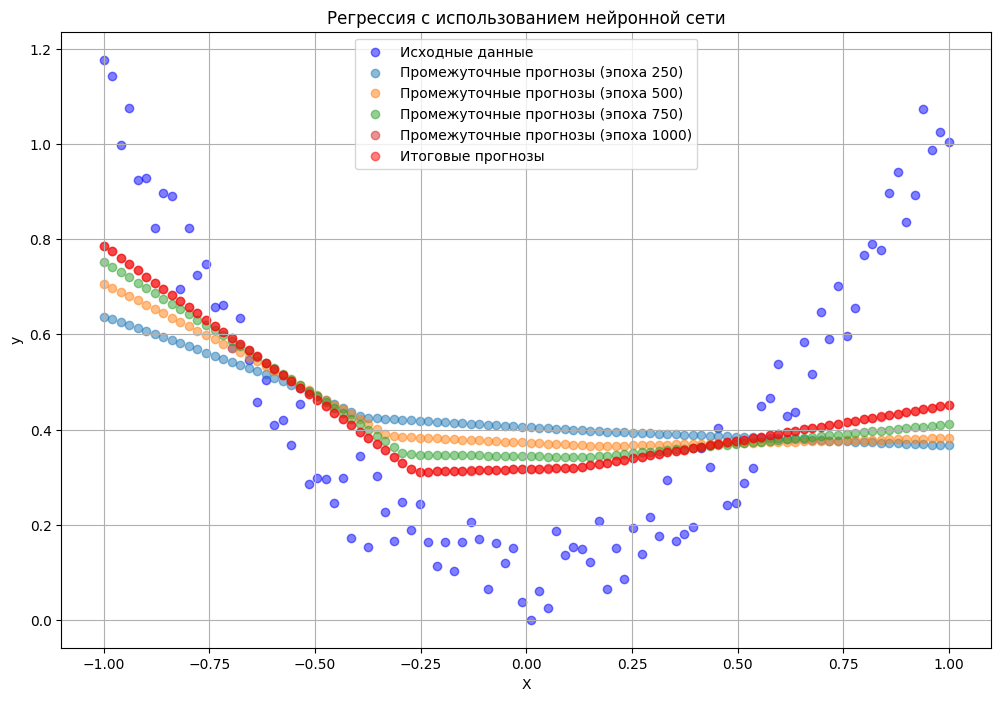

In [ ]:
import torch as th
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


th.manual_seed(42)


X = th.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * th.rand(X.size()) 


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)  #
        self.relu = nn.ReLU()        
        self.fc2 = nn.Linear(10, 1)   

    def forward(self, x):
        x = self.fc1(x)               
        x = self.relu(x)             
        x = self.fc2(x)               
        return x


def train_model(model, X, y, learning_rate=0.01, epochs=1000):
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    loss_function = nn.MSELoss()


    intermediate_predictions = []

    for epoch in range(epochs):
        model.train() 
        optimizer.zero_grad() 

      
        predictions = model(X)

    
        loss = loss_function(predictions, y)

    
        loss.backward()
        optimizer.step()

       
        if (epoch + 1) % 250 == 0:
            intermediate_predictions.append(predictions.detach().numpy())

    return intermediate_predictions


model = SimpleNN()


intermediate_predictions = train_model(model, X, y, learning_rate=0.01, epochs=1000)


plt.figure(figsize=(12, 8))


plt.scatter(X.numpy(), y.numpy(), color='blue', label='Исходные данные', alpha=0.5)


for i, preds in enumerate(intermediate_predictions):
    plt.scatter(X.numpy(), preds, label=f'Промежуточные прогнозы (эпоха {250 * (i + 1)})', alpha=0.5)


final_predictions = model(X).detach().numpy()
plt.scatter(X.numpy(), final_predictions, color='red', label='Итоговые прогнозы', alpha=0.5)


plt.title('Регрессия с использованием нейронной сети')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Обратная связь
- [ ] Хочу получить обратную связь по решению